In [42]:
# 挖掘时序的shapelets
import pandas as pd 
import os 

# 去除警告
import warnings
warnings.filterwarnings('ignore')

In [43]:
pwd = os.getcwd()

In [44]:
import numpy as np
# 提取时序交易信息

len_timeseries = 50

X_timeseries = pd.DataFrame()
indexs = []
labels = []

# 提取钓鱼信息
for filename in os.listdir(pwd + '/钓鱼一阶节点'):
    if filename.endswith('.csv'):
        data = pd.read_csv(pwd + '/钓鱼一阶节点/' + filename)
        # 当From为filname的时候，Value为负值
        data.loc[data['From'] == filename.split('.')[0], 'Value'] = -data['Value']
        # 每次交易后的余额
        data['Balance'] = data['Value'].cumsum()
        # 提取Value
        values = data['Balance'].values
        # 对齐数据，使得每个文件的数据长度相同
        if len(values) < len_timeseries:
            values = np.pad(values, (0, len_timeseries - len(values)), 'constant')
        else:
            values = values[:len_timeseries]

        # 最后一列为label
        
        X_timeseries = X_timeseries.append(pd.DataFrame(values).T)
        indexs.append(filename.split('.')[0])
        labels.append(0)

# 提取正常交易信息
for filename in os.listdir(pwd + '/非钓鱼一阶节点'):
    if filename.endswith('.csv'):
        data = pd.read_csv(pwd + '/非钓鱼一阶节点/' + filename)
        # 当From为filname的时候，Value为负值
        data.loc[data['From'] == filename.split('.')[0], 'Value'] = -data['Value']
        # 每次交易后的余额
        data['Balance'] = data['Value'].cumsum()
        # 提取Value
        values = data['Balance'].values
        # 对齐数据，使得每个文件的数据长度相同
        if len(values) < len_timeseries:
            # values = np.pad(values, (0, len_timeseries - len(values)), 'constant')
            # 设置为最后一个值
            values = np.pad(values, (0, len_timeseries - len(values)), 'edge')
        else:
            values = values[:len_timeseries]
        
        X_timeseries = X_timeseries.append(pd.DataFrame(values).T)
        indexs.append(filename.split('.')[0])
        labels.append(1)

# 最后一列的列名为label
X_timeseries['label'] = labels
X_timeseries['address'] = indexs
X_timeseries.fillna(0, inplace=True)


In [45]:
X_timeseries.index = [i for i in range(X_timeseries.shape[0])]

In [46]:
# address放到第一列
cols = X_timeseries.columns.tolist()
cols = cols[-1:] + cols[:-1]
X_timeseries = X_timeseries[cols]

X_timeseries.to_csv('./datasets/tx_timeseries.csv', index=False)

In [47]:
X_timeseries.describe()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
count,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3360.000000,3.360000e+03,3.360000e+03,...,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3.360000e+03,3360.000000
mean,769.873788,1352.361565,2020.859103,2435.838560,2474.384556,2460.230187,2461.563671,2454.263358,2.411711e+03,2.418362e+03,...,2.869127e+03,2.868995e+03,2.875667e+03,2.890531e+03,2.916032e+03,2.716079e+03,2.749672e+03,2.782972e+03,2.810344e+03,0.505952
std,5507.389409,9642.093623,15187.778288,22677.282975,23711.400426,24558.265600,25489.295296,26206.610546,2.728621e+04,2.817424e+04,...,5.324869e+04,5.356134e+04,5.378868e+04,5.411508e+04,5.479596e+04,4.779312e+04,4.868250e+04,4.943797e+04,5.015572e+04,0.500039
min,-7551.539950,-228000.000000,-228001.000000,-248001.000000,-268001.000000,-278001.000000,-308001.000000,-364800.000000,-4.559990e+05,-4.469980e+05,...,-4.279000e+05,-4.279000e+05,-4.279000e+05,-4.279000e+05,-4.279000e+05,-4.279000e+05,-4.279000e+05,-4.279000e+05,-4.279000e+05,0.000000
25%,0.100000,0.100000,0.304360,0.098248,0.083379,0.008169,0.002386,0.000861,9.110000e-16,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,0.986370,1.600000,4.197824,5.635548,7.514647,8.203674,8.689152,9.125380,9.925201e+00,1.031130e+01,...,2.288056e-03,1.845000e-03,1.590000e-03,1.845000e-03,1.451476e-03,1.386000e-03,1.273456e-03,1.071000e-03,1.224262e-03,1.000000
75%,6.990988,199.925000,746.466847,900.000000,967.164939,1000.000000,1000.014667,1000.382522,1.000157e+03,1.000734e+03,...,1.000383e+03,1.000734e+03,1.000412e+03,1.000734e+03,1.000734e+03,1.000939e+03,1.000974e+03,1.001000e+03,1.001030e+03,1.000000
max,158494.072997,200000.100000,550002.110000,887731.548291,924896.606435,960033.289736,995783.729059,995783.730059,1.033212e+06,1.071894e+06,...,2.101184e+06,2.117267e+06,2.131414e+06,2.152359e+06,2.185249e+06,2.037502e+06,2.062502e+06,2.087502e+06,2.112502e+06,1.000000


In [48]:
X_timeseries.head()

,address,0,1,2,3,4,5,6,7,8,...,41,42,43,44,45,46,47,48,49,label
0,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,0.586269,0.000861,0.948376,0.001092,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,0.500000,0.501020,0.000630,0.818430,0.000924,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
2,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,0.450017,0.457393,0.556801,0.563723,0.568270,0.570575,0.574259,0.588520,0.595542,...,3.986715,3.98932,3.991305,3.999379,4.002653,4.027329,4.227329,4.234658,4.239549,0
3,0x0061fb5485dff4bb85c078dca80d19119224d97e,0.500000,1.000000,1.500000,2.000000,2.589139,3.089139,3.189139,2.189139,2.190139,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
4,0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c,0.680000,0.004000,0.000700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0


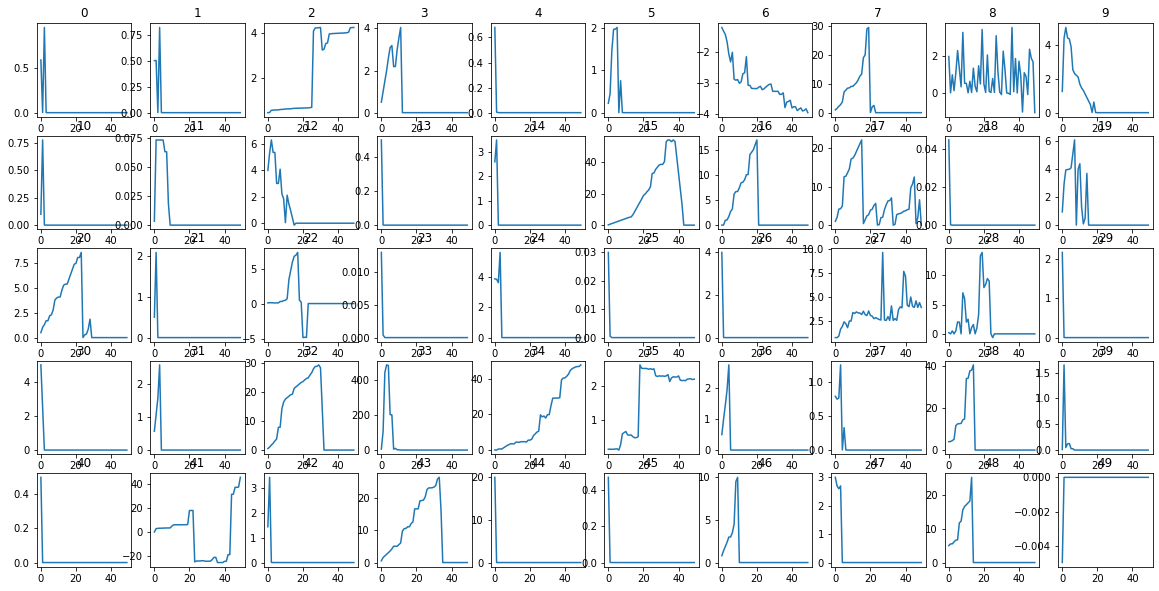

In [49]:
# 画图，共画50个，每行10个
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5, 10, figsize=(20, 10))

for i in range(50):
    axes[i // 10, i % 10].plot(X_timeseries.iloc[i, 1:-1])
    axes[i // 10, i % 10].set_title(X_timeseries.iloc[i, 0])
    # 设置title为i
    axes[i // 10, i % 10].set_title(i)

In [50]:
# 划分数据集
from sklearn.model_selection import train_test_split

X = X_timeseries.iloc[:, 1:-1]
y = X_timeseries.iloc[:, -1]


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   43.3s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:  1.7min
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:  3.2min
[Parallel(n_jobs=8)]: Done 1234 tasks      | elapsed:  4.9min
[Parallel(n_jobs=8)]: Done 1784 tasks      | elapsed:  7.0min
[Parallel(n_jobs=8)]: Done 2434 tasks      | elapsed:  9.5min
[Parallel(n_jobs=8)]: Done 3184 tasks      | elapsed: 12.3min
[Parallel(n_jobs=8)]: Done 3360 out of 3360 | elapsed: 13.0min finished


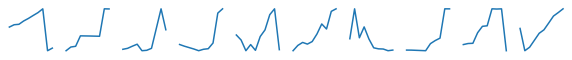

In [77]:
# 提取时间序列的shapelet
from pyts.transformation import ShapeletTransform

n_shapelets = 10

# st = ShapeletTransform(n_shapelets=n_shapelets, window_sizes=[5, 10], verbose=1, random_state=0, n_jobs=8)
st = ShapeletTransform(n_shapelets=n_shapelets, window_sizes=[10], verbose=1, random_state=0, n_jobs=8)

st.fit(X, y)

# 提取shapelet
shapelets = st.shapelets_
shapelets.shape

# 画出所有的shapelet
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(n_shapelets):
    plt.subplot(10, 10, i+1)
    plt.plot(shapelets[i])
    plt.axis('off')

array([ 0.70629   ,  1.20629   ,  2.29629   ,  3.29329   ,  0.        ,
        0.20224496,  1.20224496, 11.20224496, 21.20224496, 10.60214496])

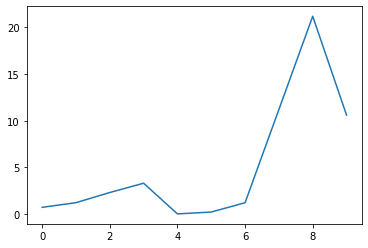

In [98]:
min_value = shapelets[2].min()
shapelet2 = shapelets[2] + abs(min_value)
plt.plot(shapelet2)
shapelet2

In [87]:
# 保存shapelet
np.save('./datasets/shapelets.npy', shapelets)

In [88]:
X_transformed = st.transform(X)

In [89]:
X_transformed

array([[2.80363471e+00, 3.38344775e-01, 6.63426138e+00, ...,
        8.23799083e-01, 7.25709835e+00, 1.94569001e+00],
       [2.80363471e+00, 3.38344775e-01, 6.63426138e+00, ...,
        8.23799083e-01, 7.25709835e+00, 1.94569001e+00],
       [2.91267354e+00, 6.81533063e-01, 5.65528643e+00, ...,
        1.01410954e+00, 6.68145091e+00, 2.00001021e+00],
       ...,
       [2.00025489e+03, 2.00005992e+03, 2.00052506e+03, ...,
        2.00008028e+03, 1.99992916e+03, 2.00008521e+03],
       [2.11391982e+02, 2.10621182e+02, 2.09114014e+02, ...,
        2.10459318e+02, 2.09119884e+02, 2.10032204e+02],
       [5.56990468e+02, 5.56499599e+02, 5.55036010e+02, ...,
        5.56347052e+02, 5.54204427e+02, 5.55866695e+02]])

In [90]:
shapelets_features = pd.DataFrame(X_transformed)
shapelets_features['label'] = X_timeseries['label']
shapelets_features['address'] = X_timeseries['address']

# 将address放到第一列
cols = shapelets_features.columns.tolist()
cols = cols[-1:] + cols[:-1]
shapelets_features = shapelets_features[cols]

shapelets_features.to_csv('./datasets/shapelets_features.csv', index=False)

In [91]:
shapelets_features.head()

,address,0,1,2,3,4,5,6,7,8,9,label
0,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,2.803635,0.338345,6.634261,5.244766,0.221186,2.735242,0.799289,0.823799,7.257098,1.94569,0
1,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,2.803635,0.338345,6.634261,5.244766,0.221186,2.735242,0.823563,0.823799,7.257098,1.94569,0
2,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,2.912674,0.681533,5.655286,4.385881,0.599845,2.189384,1.192823,1.014110,6.681451,2.00001,0
3,0x0061fb5485dff4bb85c078dca80d19119224d97e,2.803635,0.338345,6.634261,5.244766,0.221190,2.735242,1.001982,0.823799,7.045676,1.94569,0
4,0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c,2.803635,0.338345,6.634261,5.244766,0.221187,2.735242,1.001806,0.823799,7.257098,1.94569,0


In [92]:
# 将X_transformed进行划分
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=0)

# xgboost分类
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.96      0.95       338
           1       0.96      0.93      0.95       334

    accuracy                           0.95       672
   macro avg       0.95      0.95      0.95       672
weighted avg       0.95      0.95      0.95       672



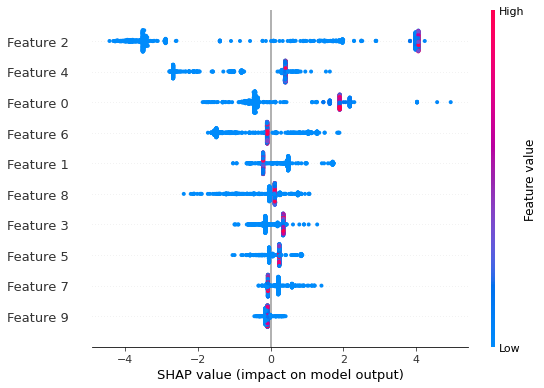

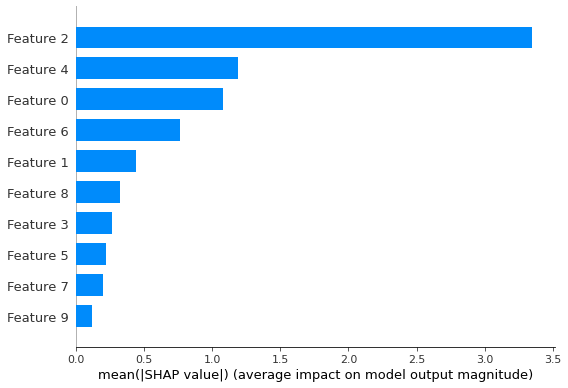

In [93]:
# SHAP解释样本
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)

# SHAP输出特征重要性
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [75]:
# 读取shaplet featues
shapelets_features = pd.read_csv('./datasets/shapelets_features.csv')

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(shapelets_features.drop(['label', 'address'], axis=1), shapelets_features['label'], test_size=0.2, random_state=0)

# 使用shapelet进行训练
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)

# 预测
y_pred = clf.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.98      0.97       338
           1       0.98      0.96      0.97       334

    accuracy                           0.97       672
   macro avg       0.97      0.97      0.97       672
weighted avg       0.97      0.97      0.97       672

